In [1]:
import os
import glob
import sys
import time
import yaml
import napari
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import ipywidgets as widgets
from cellpose import io, plot, models, train
from matplotlib import pyplot as plt
import napari

In [2]:
ims_dir = "/Users/onur.serce/Desktop/my_labelings"

In [3]:
channel = 2

In [4]:
selected_tiffs = [i for i in os.listdir(ims_dir) if i.endswith(".tiff")]
images = [io.imread(os.path.join(ims_dir, im))[:, :, channel] for im in selected_tiffs]
training_im_paths = [os.path.join(ims_dir, im) for im in selected_tiffs if os.path.exists(os.path.join(ims_dir, im[:-5]+"_seg.npy"))]
training_ims = [io.imread(im)[:, :, channel] for im in training_im_paths]
training_im_paths

['/Users/onur.serce/Desktop/my_labelings/p1_wA1_t1_m20_c3_z1_l1_o0.tiff',
 '/Users/onur.serce/Desktop/my_labelings/p1_wA1_t1_m19_c3_z1_l1_o0.tiff']

uint16


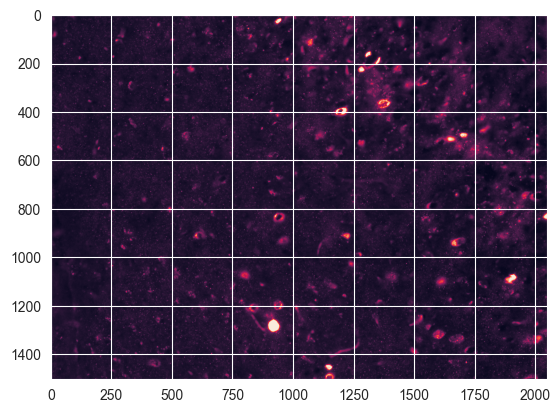

In [5]:
image = training_ims[0]#.astype('float64')
#image *= 255.0/image.max()
plt.imshow(image)
print(image.dtype)

In [6]:
masks = [os.path.join(ims_dir, im)[:-5]+"_seg.npy" for im in selected_tiffs if os.path.exists(os.path.join(ims_dir, im[:-5]+"_seg.npy"))]

In [7]:
np.load(masks[0], allow_pickle=True).item().keys()

dict_keys(['outlines', 'colors', 'masks', 'chan_choose', 'filename', 'flows', 'ismanual', 'manual_changes', 'model_path', 'flow_threshold', 'cellprob_threshold', 'normalize_params', 'restore', 'ratio', 'diameter'])

In [8]:
np.load(masks[0], allow_pickle=True).item()['masks'].shape

(1504, 2048)

In [ ]:
labels = [np.load(mask, allow_pickle=True).item()['masks'] for mask in masks]

In [ ]:
model = models.CellposeModel(model_type="cyto3", nchan=2)
channels = [0, 0]

custom_model = train.train_seg(model.net, train_data=training_ims, train_labels=labels,
                               channels=channels, normalize=True,
                               weight_decay=1e-6, SGD=True, learning_rate=1e-3,
                               n_epochs=50, model_name="CLI_trained_cFos-AF555",
                               save_path='/Users/onur.serce')

print("Done with training the model")


In [ ]:
model = models.CellposeModel(pretrained_model="/Users/onur.serce/models/CLI_trained_cFos-AF555", nchan=2)

masks, flows, styles = model.eval(images,
                                  channels=channels,
                                  flow_threshold=0.3,
                                  cellprob_threshold=3,
                                  min_size=35)


In [ ]:
print('Writing outputs to disk')
io.save_masks(images, masks, flows, mask_names, png=False, tif=True, channels=channels,
              suffix="", save_flows=True, save_outlines=True, dir_above=False, in_folders=True,
              savedir=output_dir, save_txt=True, save_mpl=False)